# Pytorch: NN
https://pytorch.org/tutorials/beginner/examples_nn/polynomial_nn.html  

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib



PyTorch: nn
-----------

A third order polynomial, trained to predict $y=\sin(x)$ from $-\pi$
to $pi$ by minimizing squared Euclidean distance.

This implementation uses the nn package from PyTorch to build the network.
PyTorch autograd makes it easy to define computational graphs and take gradients,
but raw autograd can be a bit too low-level for defining complex neural networks;
this is where the nn package can help. The nn package defines a set of Modules,
which you can think of as a neural network layer that has produces output from
input and may have some trainable weights.



In [2]:
import math
import torch

# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

In [3]:
x.shape, x.unsqueeze(-1).shape

(torch.Size([2000]), torch.Size([2000, 1]))

In [4]:
# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3)

p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)
xx.shape, xx

(torch.Size([2000, 3]),
 tensor([[ -3.1416,   9.8696, -31.0063],
         [ -3.1384,   9.8499, -30.9133],
         [ -3.1353,   9.8301, -30.8205],
         ...,
         [  3.1353,   9.8301,  30.8205],
         [  3.1384,   9.8499,  30.9133],
         [  3.1416,   9.8696,  31.0063]]))

In [5]:
# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
    )

In [6]:
# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction = 'sum')

In [7]:
learning_rate = 1e-6

for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

99 558.0782470703125
199 375.3951110839844
299 253.6082000732422
399 172.3775177001953
499 118.1689224243164
599 81.9734878540039
699 57.791587829589844
799 41.62586212158203
899 30.8122615814209
999 23.573932647705078
1099 18.72550392150879
1199 15.475484848022461
1299 13.295294761657715
1399 11.83164119720459
1499 10.848183631896973
1599 10.186864852905273
1699 9.741762161254883
1799 9.441920280456543
1899 9.239745140075684
1999 9.103290557861328


In [8]:
# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]
linear_layer

Linear(in_features=3, out_features=1, bias=True)

In [9]:
linear_layer.weight.shape

torch.Size([1, 3])

In [10]:
linear_layer.bias

Parameter containing:
tensor([-0.0107], requires_grad=True)

In [11]:
# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} +  \
{linear_layer.weight[:, 0].item()} * x**1   + \
{linear_layer.weight[:, 1].item()} * x**2 + \
{linear_layer.weight[:, 2].item()} * x**3')

Result: y = -0.01069309189915657 +  0.8435523509979248 * x**1   + 0.0018447361653670669 * x**2 + -0.09145443886518478 * x**3


In [12]:
x.shape, x.device, x.dtype, x.requires_grad

(torch.Size([2000]), device(type='cpu'), torch.float32, False)

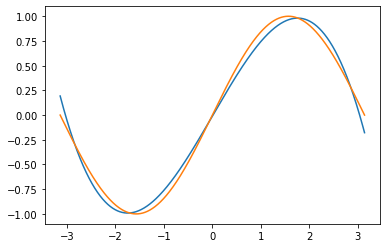

In [13]:
y = linear_layer.bias.item() + \
    linear_layer.weight[:, 0] * x**1 + \
    linear_layer.weight[:, 1] * x**2 + \
    linear_layer.weight[:, 2] * x**3
 
plt.plot(x, y.detach()); 
plt.plot(x, np.sin(x)); 